# Paddy Disesase Detection Using Deep Learning CNN or Transfer Learning

In [9]:
# Getting Data From the Kaggle
!pip install -q kaggle

In [10]:
!mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets list

ref                                                             title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                              Data Science Job Salaries                        7KB  2022-06-15 08:59:12          21785        672  1.0              
josephcheng123456/olympic-historical-dataset-from-olympediaorg  Olympic Historical Dataset From Olympedia.org   25MB  2022-08-18 14:18:14            718         27  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts             McDonald's India : Menu Nutrition Dataset        5KB  2022-07-28 17:08:52           1896         99  0.9411765        
gpreda/life-expectancy-in-europe-by-age-and-sex                 Life Expectancy in Eu

In [14]:
!kaggle competitions download -c paddy-disease-classification

100% 1.02G/1.02G [00:05<00:00, 226MB/s]
100% 1.02G/1.02G [00:05<00:00, 190MB/s]


In [15]:
from zipfile import ZipFile
zipref = ZipFile('paddy-disease-classification.zip','r')
zipref.extractall()
zipref.close()

In [64]:
# Getting data From directory
import os
class_names = os.listdir('train_images')

train_dir = 'train_images/'
class_names = ['bacterial_leaf_blight','bacterial_leaf_streak','bacterial_panicle_blight','blast','brown_spot','dead_heart','downy_mildew','hispa','normal','tungro']
len(class_names)

10

In [17]:
# Visualizing Data to get insight of data
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import random

def get_random_image(target_class):
  target_dir = "train_images/" + target_class

  random_image = random.sample(os.listdir(target_dir),1)
  # print(random_image[0])
  img = mimg.imread(target_dir+'/'+random_image[0])

  plt.imshow(img/255.)
  plt.axis(False)
  plt.title(target_class);
  return img

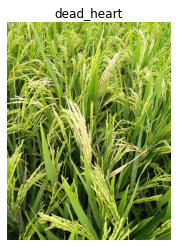

In [18]:
img = get_random_image(class_names[1])

In [19]:
img/255.

array([[[0.57647059, 0.6       , 0.3254902 ],
        [0.7254902 , 0.72941176, 0.47058824],
        [0.73333333, 0.71764706, 0.47058824],
        ...,
        [0.81176471, 0.90980392, 0.34901961],
        [0.65490196, 0.75686275, 0.17254902],
        [0.74901961, 0.84705882, 0.24705882]],

       [[0.51372549, 0.54117647, 0.23921569],
        [0.72941176, 0.7372549 , 0.45098039],
        [0.69803922, 0.68627451, 0.42352941],
        ...,
        [0.72156863, 0.81960784, 0.25882353],
        [0.62745098, 0.72941176, 0.14509804],
        [0.67058824, 0.77254902, 0.18039216]],

       [[0.52156863, 0.55294118, 0.21568627],
        [0.77254902, 0.79215686, 0.4627451 ],
        [0.65882353, 0.65098039, 0.35686275],
        ...,
        [0.8627451 , 0.96862745, 0.40784314],
        [0.76078431, 0.85882353, 0.28627451],
        [0.72156863, 0.82352941, 0.23137255]],

       ...,

       [[0.12941176, 0.25098039, 0.01960784],
        [0.15294118, 0.2745098 , 0.04313725],
        [0.14901961, 0

In [20]:
# Prepraring our Data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255.,
                             validation_split=0.2)

In [21]:
train_data = datagen.flow_from_directory(directory=train_dir,
                                         batch_size=32,
                                         target_size=(224,224),
                                         class_mode="categorical",
                                         shuffle=True,
                                         subset="training")

validation_data = datagen.flow_from_directory(directory=train_dir,
                                         batch_size=32,
                                         target_size=(224,224),
                                         class_mode="categorical",
                                         shuffle=True,
                                         subset="validation")

Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.


In [22]:
images,labels = train_data.next()

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

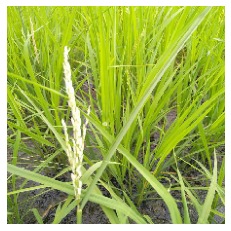

In [23]:
plt.imshow(images[1])
plt.axis(False);
labels[1]

In [24]:
# Creating our base line model
from tensorflow.keras.layers import Dropout,Dense,Activation,Conv2D,MaxPool2D,Flatten,Input,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import Sequential

baseline_model = Sequential([
    Conv2D(64,(3*3),activation="relu",input_shape=(224,224,3),padding="valid"),
    MaxPool2D(pool_size=(2*2)),
    Dropout(0.1),

    Conv2D(128,(3*3),padding="valid",activation="relu"),
    MaxPool2D(pool_size=(2*2)),
    Conv2D(32,(2*2),activation="relu"),
    MaxPool2D(pool_size=(1*1)),

    Flatten(),
    Dense(len(class_names),activation="softmax")
])

In [25]:
# Compiling Our Model
baseline_model.compile(loss="categorical_crossentropy",
                       optimizer=Adam(),
                       metrics=['accuracy'])

In [26]:
# Fitting our model

baseline_model.fit(train_data,
                   epochs=100,
                   steps_per_epoch=len(train_data),
                   validation_data=validation_data,
                   validation_steps=int(0.25 * len(validation_data)))


Epoch 1/100
261/261 [==============================] - 72s 224ms/step - loss: 2.1207 - accuracy: 0.2167 - val_loss: 1.9810 - val_accuracy: 0.2832
Epoch 2/100
261/261 [==============================] - 62s 236ms/step - loss: 1.8485 - accuracy: 0.3491 - val_loss: 1.6557 - val_accuracy: 0.4316
Epoch 3/100
261/261 [==============================] - 57s 219ms/step - loss: 1.6718 - accuracy: 0.4286 - val_loss: 1.6187 - val_accuracy: 0.4434
Epoch 4/100
261/261 [==============================] - 56s 216ms/step - loss: 1.5695 - accuracy: 0.4600 - val_loss: 1.5731 - val_accuracy: 0.4551
Epoch 5/100
261/261 [==============================] - 57s 218ms/step - loss: 1.4967 - accuracy: 0.4933 - val_loss: 1.4991 - val_accuracy: 0.5039
Epoch 6/100
261/261 [==============================] - 58s 221ms/step - loss: 1.4198 - accuracy: 0.5168 - val_loss: 1.6085 - val_accuracy: 0.4746
Epoch 7/100
261/261 [==============================] - 57s 216ms/step - loss: 1.3372 - accuracy: 0.5492 - val_loss: 1.3577 -

In [27]:
epochs = range(len(baseline_model.history.history['val_loss']))
accuracy = baseline_model.history.history['accuracy']
val_accuracy = baseline_model.history.history['val_accuracy']
loss = baseline_model.history.history['loss']
val_loss = baseline_model.history.history['val_loss']

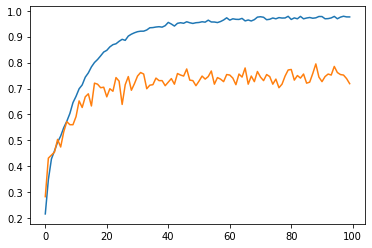

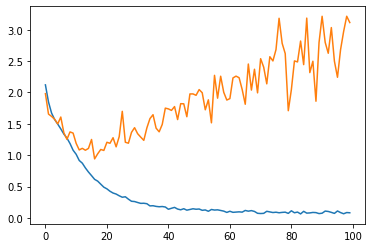

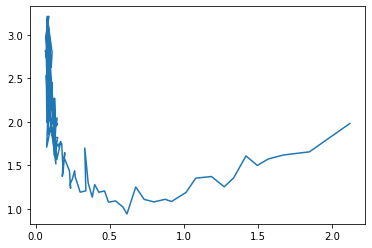

In [28]:
plt.figure()
plt.plot(epochs,accuracy,label="accuracy")
plt.plot(epochs,val_accuracy,label="val_accuracy");

plt.figure()
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss");

plt.figure()
plt.plot(loss,val_loss,label="loss vs accuract");

In [29]:
train_data = datagen.flow_from_directory(directory=train_dir,
                                         batch_size=32,
                                         target_size=(299,299),
                                         class_mode="categorical",
                                         shuffle=True,
                                         subset="training")

validation_data = datagen.flow_from_directory(directory=train_dir,
                                         batch_size=32,
                                         target_size=(299,299),
                                         class_mode="categorical",
                                         shuffle=True,
                                         subset="validation")

Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.


In [30]:
# Making Another Model to beat our baseline_model
from tensorflow.keras import layers

input = layers.Input(shape=(299,299,3),name="input_layer")
conv_1 = Conv2D(32,(1*1),name="conv_1")(input)
conv_2 = Conv2D(64,(1*1),name="conv_2")(conv_1)
conv_3 = Conv2D(64,(1*1),name="conv_2")(conv_1)
conv_4 = Conv2D(96,(3*3),name="conv_4")(conv_3)
conv_5 = Conv2D(64,(1*1),name="conv_5")(conv_1)
conv_6 = Conv2D(48,(5*5),name="conv_6")(conv_5)

avg_layer = AveragePooling2D(pool_size=(3*3))(conv_1)
conv_7 = Conv2D(32,(1*1),name="conv_7")(avg_layer)
flatten = Flatten()(conv_7)
output = Dense(len(class_names),activation="softmax",name="output")(flatten)

model_1 = tf.keras.Model(input,output)

model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 299, 299, 3)]     0         
                                                                 
 conv_1 (Conv2D)             (None, 299, 299, 32)      128       
                                                                 
 average_pooling2d (AverageP  (None, 33, 33, 32)       0         
 ooling2D)                                                       
                                                                 
 conv_7 (Conv2D)             (None, 33, 33, 32)        1056      
                                                                 
 flatten_1 (Flatten)         (None, 34848)             0         
                                                                 
 output (Dense)              (None, 10)                348490    
                                                             

In [31]:
# Compiling model_1
model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [32]:
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=int(0.25 * len(validation_data)))

Epoch 1/5
261/261 [==============================] - 59s 223ms/step - loss: 1.9066 - accuracy: 0.3637 - val_loss: 1.6108 - val_accuracy: 0.4395
Epoch 2/5
261/261 [==============================] - 57s 217ms/step - loss: 1.3924 - accuracy: 0.5331 - val_loss: 1.3475 - val_accuracy: 0.5918
Epoch 3/5
261/261 [==============================] - 57s 217ms/step - loss: 1.1535 - accuracy: 0.6275 - val_loss: 1.3835 - val_accuracy: 0.5664
Epoch 4/5
261/261 [==============================] - 57s 217ms/step - loss: 0.9953 - accuracy: 0.6832 - val_loss: 1.3628 - val_accuracy: 0.5449
Epoch 5/5
261/261 [==============================] - 57s 217ms/step - loss: 0.8653 - accuracy: 0.7190 - val_loss: 1.3138 - val_accuracy: 0.5898


In [33]:
# Ploting our Loss and accuracy curve's 
epochs = range(len(model_1.history.history['val_loss']))
accuracy = model_1.history.history['accuracy']
val_accuracy = model_1.history.history['val_accuracy']
loss = model_1.history.history['loss']
val_loss = model_1.history.history['val_loss']

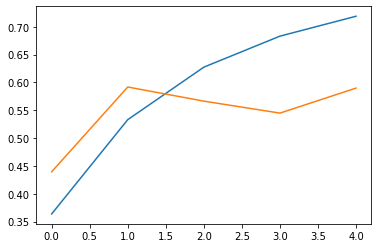

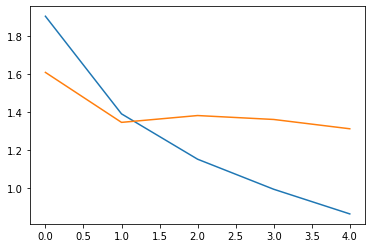

In [34]:
plt.figure()
plt.plot(epochs,accuracy,label="accuracy")
plt.plot(epochs,val_accuracy,label="val_accuracy");

plt.figure()
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss");

In [35]:
train_data = datagen.flow_from_directory(directory=train_dir,
                                         batch_size=32,
                                         target_size=(224,224),
                                         class_mode="categorical",
                                         shuffle=True,
                                         subset="training")

validation_data = datagen.flow_from_directory(directory=train_dir,
                                         batch_size=32,
                                         target_size=(224,224),
                                         class_mode="categorical",
                                         shuffle=True,
                                         subset="validation")

Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.


In [36]:
# Using Tranfer learning EfficentNetB0 to train out model
from tensorflow import keras

input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create The input layer
inputs = layers.Input(shape=input_shape,name='input_layer')


x = base_model(inputs,training=False)

# Pool the output features of base model
x = layers.Flatten(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

# Make a model
model_2 = keras.Model(inputs,outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1_percent = model_2.fit(train_data,
                                epochs=15,
                                steps_per_epoch=len(train_data),
                                validation_data=validation_data,
                                validation_steps=int(0.25 * len(validation_data)))

16719872/16705208 [==============================] - 0s 0us/step
Epoch 1/15
261/261 [==============================] - 62s 217ms/step - loss: 2.1722 - accuracy: 0.1600 - val_loss: 2.1858 - val_accuracy: 0.1699
Epoch 2/15
261/261 [==============================] - 55s 212ms/step - loss: 2.1660 - accuracy: 0.1697 - val_loss: 2.1673 - val_accuracy: 0.1680
Epoch 3/15
261/261 [==============================] - 55s 212ms/step - loss: 2.1660 - accuracy: 0.1702 - val_loss: 2.1495 - val_accuracy: 0.1777
Epoch 4/15
261/261 [==============================] - 55s 211ms/step - loss: 2.1649 - accuracy: 0.1802 - val_loss: 2.1872 - val_accuracy: 0.1836
Epoch 5/15
261/261 [==============================] - 55s 212ms/step - loss: 2.1621 - accuracy: 0.1872 - val_loss: 2.1852 - val_accuracy: 0.1465
Epoch 6/15
261/261 [==============================] - 54s 206ms/step - loss: 2.1593 - accuracy: 0.1876 - val_loss: 2.1359 - val_accuracy: 0.1934
Epoch 7/15
261/261 [==============================] - 55s 210ms/s

In [37]:
# Adding more layers to our baseline model 
model_3 = Sequential([
    Conv2D(32,(1*1),activation="relu",input_shape=(224,224,3),padding="same"),
    MaxPool2D(pool_size=(1*1)),
    Dropout(0.1),

    Conv2D(32,(1*1),padding="same",activation="relu"),
    MaxPool2D(pool_size=(1*1)),
    Conv2D(64,(2*2),activation="relu"),
    MaxPool2D(pool_size=(2*2)),
    Dropout(0.1),

    Conv2D(64,(2*2),activation="relu",padding="valid"),
    MaxPool2D(pool_size=(2*2)),
    Conv2D(128,(3*3),activation="relu",padding="same"),
    MaxPool2D(pool_size=(1*1)),
    Dropout(0.1),

    Flatten(),
    Dense(len(class_names),activation="softmax")
])

In [40]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [41]:
model_3.fit(train_data,
            epochs=15,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=int(0.25 * len(validation_data)))

Epoch 1/15
261/261 [==============================] - 67s 245ms/step - loss: 1.9744 - accuracy: 0.2908 - val_loss: 1.8402 - val_accuracy: 0.3477
Epoch 2/15
261/261 [==============================] - 64s 246ms/step - loss: 1.3819 - accuracy: 0.5355 - val_loss: 1.3002 - val_accuracy: 0.5840
Epoch 3/15
261/261 [==============================] - 63s 239ms/step - loss: 0.8904 - accuracy: 0.7133 - val_loss: 1.1665 - val_accuracy: 0.6816
Epoch 4/15
261/261 [==============================] - 62s 239ms/step - loss: 0.5357 - accuracy: 0.8317 - val_loss: 0.6216 - val_accuracy: 0.7969
Epoch 5/15
261/261 [==============================] - 63s 239ms/step - loss: 0.3326 - accuracy: 0.8983 - val_loss: 0.5545 - val_accuracy: 0.8574
Epoch 6/15
261/261 [==============================] - 63s 240ms/step - loss: 0.2067 - accuracy: 0.9336 - val_loss: 0.6009 - val_accuracy: 0.8457
Epoch 7/15
261/261 [==============================] - 74s 283ms/step - loss: 0.1495 - accuracy: 0.9521 - val_loss: 1.0480 - val_ac

In [42]:
epochs = range(len(model_3.history.history['val_loss']))
accuracy = model_3.history.history['accuracy']
val_accuracy = model_3.history.history['val_accuracy']
loss = model_3.history.history['loss']
val_loss = model_3.history.history['val_loss']

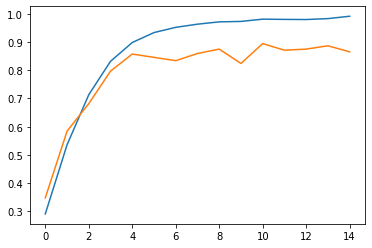

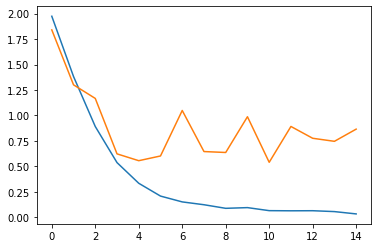

In [43]:
plt.figure()
plt.plot(epochs,accuracy,label="accuracy")
plt.plot(epochs,val_accuracy,label="val_accuracy");

plt.figure()
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss");

In [45]:
# Savin our model
model_3.save("drive/MyDrive/paddy_disease_detection_using_cnn")


## Now as we can se we get val_accuracy upto 85% we can add more layers to our model to improve its accuracy but we are happy 🙂 with its result we can also use other models like imagenet ResNetV50 to train our model to get more good results

In [46]:
# Making predection on our model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads and image from a filename, turns it into a tensor and reshape it to (img_shape,img_shape,colour_channels).
  """
  # Read in Image
  img = tf.io.read_file(filename)
 # Decode read file into a tensor
  img = tf.image.decode_image(img)
 # Resize our image
  img = tf.image.resize(img,size=[img_shape,img_shape])
 # Rescale the image
  img = img/225.
  return img

In [47]:
img = load_and_prep_image('test_images/200001.jpg')

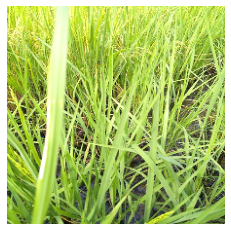

In [50]:
plt.imshow(img)
plt.axis(False);

In [68]:
predction = model_3.predict(tf.expand_dims(img,axis=0))
class_names

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [69]:
def pred_and_plot(model,filename,class_name=class_names):
  """
  Imports images located at filname,make a predection with image and plots image with predection
  """
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)
  
  # Make a predection
  pred = model.predict(tf.expand_dims(img,axis=0))
  print(pred[0])    

  # Get the predection class
  pred_class = class_name[tf.argmax(pred[0])]

  # plot image

  plt.imshow(img)
  plt.title(f"Predection: {pred_class}")
  plt.axis(False);

[7.8571364e-05 2.1048772e-23 2.0609466e-16 1.8408153e-12 8.0926226e-14
 9.9970859e-01 7.8367336e-13 2.1280994e-04 1.8694972e-12 4.0157402e-10]


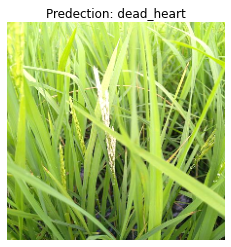

In [70]:
pred_and_plot(model_3,'/content/train_images/dead_heart/100008.jpg')

In [66]:
class_names

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [75]:
!wget https://bugwoodcloud.org/images/1536x1024/5439530.jpg

--2022-08-20 10:53:04--  https://bugwoodcloud.org/images/1536x1024/5439530.jpg
Resolving bugwoodcloud.org (bugwoodcloud.org)... 18.160.249.26, 18.160.249.24, 18.160.249.31, ...
Connecting to bugwoodcloud.org (bugwoodcloud.org)|18.160.249.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108113 (106K) [application/octet-stream]
Saving to: ‘5439530.jpg’

5439530.jpg         100%[===================>] 105.58K  --.-KB/s    in 0.03s   

2022-08-20 10:53:05 (3.77 MB/s) - ‘5439530.jpg’ saved [108113/108113]



[9.9997282e-01 1.5841354e-11 9.8908938e-14 3.9264965e-08 2.2217855e-05
 2.4883581e-10 3.4835483e-09 3.9037882e-06 7.0145179e-12 1.1175254e-06]


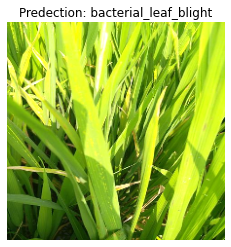

In [80]:
pred_and_plot(model_3,'/content/test_images/200059.jpg')